In [1]:
import numpy as np
import pandas as pd

from tqdm import tqdm
from pathlib import Path

from utils.data import get_hsm_dataset

Removing empty files

In [2]:
for subfolder in Path("data/huge_stock_market_dataset").iterdir():
    if subfolder.is_dir():
        for file in subfolder.iterdir():
            if file.stat().st_size == 0:
                print(file)
                file.unlink()

In [3]:
properties = {"filename": [], "length": [], "uptrending_rate": []}
for subfolder in Path("data/huge_stock_market_dataset").iterdir():
    if subfolder.is_dir():
        for file in tqdm(subfolder.iterdir()):
            ts = pd.read_csv(file, usecols=["Close"])
            properties["filename"].append(file.name)
            properties["length"].append(len(ts))
            properties["uptrending_rate"].append((ts.Close.diff(1).dropna() > 0).mean())
properties = pd.DataFrame(properties)

1344it [00:13, 102.42it/s]
7163it [01:07, 106.63it/s]


<AxesSubplot:>

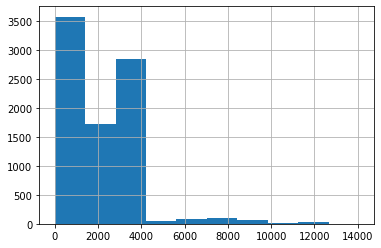

In [4]:
properties.length.hist()

<AxesSubplot:>

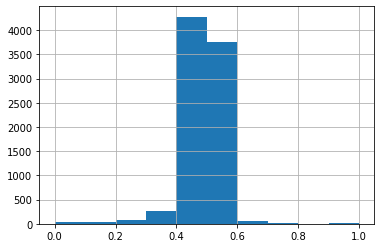

In [5]:
properties.uptrending_rate.hist()

<AxesSubplot:>

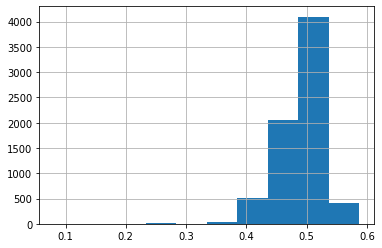

In [6]:
properties[properties.length > 365].uptrending_rate.hist()

In [7]:
properties

,filename,length,uptrending_rate
0,aadr.us.txt,1565,0.521739
1,aaxj.us.txt,2325,0.527108
2,acim.us.txt,1232,0.529651
3,actx.us.txt,272,0.505535
4,acwf.us.txt,403,0.509950
...,...,...,...
8502,zumz.us.txt,3153,0.502855
8503,zvv.us.txt,5,0.250000
8504,zx.us.txt,1620,0.420012
8505,zyme.us.txt,138,0.394161


In [8]:
properties[properties.length >= 365].to_csv("data\\huge_stock_market_dataset\\more_year.csv", index=False)

In [9]:
np.random.seed(0)
length_intervals = [365, 1000, 2000, 3000, 4000, properties.length.max()]
uptrending_rate_intervals = [0.1, 0.4, 0.45, 0.5, 0.55, 0.6]

selected = []
for i in range(len(length_intervals) - 1):
    for j in range(len(uptrending_rate_intervals) - 1):
        candidats = properties[(length_intervals[i + 1] > properties.length) & (properties.length > length_intervals[i]) &
                (uptrending_rate_intervals[j + 1] > properties.uptrending_rate) & (properties.uptrending_rate > uptrending_rate_intervals[j])].index
        if len(candidats) > 0:
            selected.append(np.random.choice(candidats))
selected = properties.iloc[selected]
print(len(selected))
selected.to_csv("data\\huge_stock_market_dataset\\selected.csv", index=False)

24
